## TASK 1: Data Cleaning and Exploration.

In [13]:
#Importing Data from CSV file..
import pandas as pd
df = pd.read_csv('dataset for Data Analyst I Assessment.csv')
df.head() 

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14


In [15]:
## getting summary of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          250 non-null    object 
 1   Category            250 non-null    object 
 2   Supplier            250 non-null    object 
 3   Warehouse_Location  250 non-null    object 
 4   Order_Date          250 non-null    object 
 5   Delivery_Date       250 non-null    object 
 6   Inventory_Level     250 non-null    int64  
 7   Stockouts           250 non-null    int64  
 8   Unit_Cost           250 non-null    float64
 9   Lead_Time           250 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB


,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
count,250.000000,250.000000,250.000000,250.0000
mean,256.348000,0.188000,247.996080,10.0000
std,138.852392,0.391496,138.993919,5.0785
min,1.000000,0.000000,5.570000,1.0000
25%,149.000000,0.000000,126.965000,6.0000
50%,268.000000,0.000000,247.265000,10.0000
75%,373.750000,0.000000,377.477500,14.0000
max,499.000000,1.000000,493.750000,19.0000


In [25]:
# Converting Order_Date and Delivery_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product_ID          250 non-null    object        
 1   Category            250 non-null    object        
 2   Supplier            250 non-null    object        
 3   Warehouse_Location  250 non-null    object        
 4   Order_Date          250 non-null    datetime64[ns]
 5   Delivery_Date       250 non-null    datetime64[ns]
 6   Inventory_Level     250 non-null    int64         
 7   Stockouts           250 non-null    int64         
 8   Unit_Cost           250 non-null    float64       
 9   Lead_Time           250 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 19.7+ KB


In [16]:
#Looking for NULL values in the dataset
df.isnull().sum()

Product_ID            0
Category              0
Supplier              0
Warehouse_Location    0
Order_Date            0
Delivery_Date         0
Inventory_Level       0
Stockouts             0
Unit_Cost             0
Lead_Time             0
dtype: int64

In [26]:
#Looking for Missing Values in the dataset
df.isnull().values.any()

np.False_

In [20]:
## Checking if any Duplicate records
df[df.duplicated()]

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time


In [ ]:
# Getting list of unique categories
categories = df['Category'].unique()

# Getting list of unique suppliers
suppliers = df['Supplier'].unique()

# Getting list of unique warehouse locations
warehouse_locations = df['Warehouse_Location'].unique()

print("Categories:", categories)
print("Suppliers:", suppliers)
print("Warehouse Locations:", warehouse_locations)

Categories: ['Toys' 'Furniture' 'Food' 'Clothing' 'Electronics']
Suppliers: ['Supplier B' 'Supplier C' 'Supplier D' 'Supplier A']
Warehouse Locations: ['Chicago' 'San Francisco' 'Dallas' 'New York']


In [ ]:
# Making sure delivery dates are logical (Delivery_Date > Order_Date)
# Conclusion: Dates are logical!
invalid_dates = df[df['Delivery_Date'] < df['Order_Date']]
print(f"\n Invalid Dates : {invalid_dates}")



 Invalid Dates : Empty DataFrame
Columns: [Product_ID, Category, Supplier, Warehouse_Location, Order_Date, Delivery_Date, Inventory_Level, Stockouts, Unit_Cost, Lead_Time]
Index: []


In [34]:
# Making sure Lead_Time Makes sense with Order_Date and Delivery_Date..
# Definitely.. Lead Times are incorrect.
df['Calculated_Lead_Time'] = (df['Delivery_Date'] - df['Order_Date']).dt.days
lead_time_mismatches = df[df['Calculated_Lead_Time'] != df['Lead_Time']]
print("\n--- Lead Time Mismatches ---")
print(lead_time_mismatches)



--- Lead Time Mismatches ---
    Product_ID   Category    Supplier Warehouse_Location Order_Date  \
2        P0003  Furniture  Supplier B            Chicago 2025-01-22   
5        P0006   Clothing  Supplier D           New York 2025-02-20   
19       P0020       Food  Supplier B            Chicago 2025-03-24   
21       P0022       Toys  Supplier D           New York 2025-03-02   
24       P0025       Toys  Supplier D            Chicago 2025-03-24   
..         ...        ...         ...                ...        ...   
221      P0222       Toys  Supplier B             Dallas 2025-04-09   
225      P0226  Furniture  Supplier D            Chicago 2025-03-05   
235      P0236   Clothing  Supplier C           New York 2025-02-02   
242      P0243       Food  Supplier A      San Francisco 2025-04-06   
246      P0247   Clothing  Supplier C            Chicago 2025-04-09   

    Delivery_Date  Inventory_Level  Stockouts  Unit_Cost  Lead_Time  \
2      2025-02-08              270          0 

In [33]:
# Checking if any negative values in Inventory Level and Stockouts..
invalid_inventory = df[(df['Inventory_Level'] < 0) | (df['Stockouts'] < 0)]
print("\n--- Invalid Inventory/Stockouts ---")
print(invalid_inventory)



--- Invalid Inventory/Stockouts ---
Empty DataFrame
Columns: [Product_ID, Category, Supplier, Warehouse_Location, Order_Date, Delivery_Date, Inventory_Level, Stockouts, Unit_Cost, Lead_Time, Calculated_Lead_Time]
Index: []


Calculating Average Delivery Lead_Time Per Supplier

In [45]:
# Assuming the given Lead_Time in the Dataset is Promised by Supplier.
# 1. Average PROMISED lead time per supplier
avg_promised = (
    df.groupby("Supplier", as_index=False)["Lead_Time"]
      .mean()
      .rename(columns={"Lead_Time": "Avg_Promised_Lead_Time"})
)
avg_promised["Avg_Promised_Lead_Time"] = avg_promised["Avg_Promised_Lead_Time"].round(2)

# 2. Average ACTUAL (Calculated) lead time per supplier
avg_actual = (
    df.groupby("Supplier", as_index=False)["Calculated_Lead_Time"]
      .mean()
      .rename(columns={"Calculated_Lead_Time": "Avg_Actual_Lead_Time"})
)
avg_actual["Avg_Actual_Lead_Time"] = avg_actual["Avg_Actual_Lead_Time"].round(2)

# Side-by-side combined table
combined = avg_promised.merge(avg_actual, on="Supplier")
print("\nCombined (Promised vs Actual) per Supplier:")
print(combined)


Combined (Promised vs Actual) per Supplier:
     Supplier  Avg_Promised_Lead_Time  Avg_Actual_Lead_Time
0  Supplier A                   10.67                 11.40
1  Supplier B                    9.02                  9.97
2  Supplier C                    9.60                 10.08
3  Supplier D                   10.82                 11.87


Calculating Percentage of late deliveries by category

In [47]:
# Marking late deliveries (1 if late, 0 if not)
df["Is_Late"] = (df["Calculated_Lead_Time"] > df["Lead_Time"]).astype(int)

# % late deliveries by category
late_deliveries = (df.groupby("Category")["Is_Late"].mean() * 100).round(2)

print(late_deliveries)

Category
Clothing       15.09
Electronics    24.49
Food           39.22
Furniture      27.08
Toys           26.53
Name: Is_Late, dtype: float64


In [51]:
# % of late deliveries by supplier.

late_by_supplier = (
    df.groupby("Supplier")["Is_Late"]
      .mean()
      .reset_index()
      .rename(columns={"Is_Late": "Late_Delivery_%"})
)
late_by_supplier["Late_Delivery_%"] = (late_by_supplier["Late_Delivery_%"] * 100).round(2)

print("\n% of Late Deliveries by Supplier:")
print(late_by_supplier)


% of Late Deliveries by Supplier:
     Supplier  Late_Delivery_%
0  Supplier A            27.59
1  Supplier B            29.23
2  Supplier C            16.92
3  Supplier D            32.26


Calculating Stockout Frequency per Warehouse

In [53]:
# Stockout frequency = how many times stockouts happened (>0) in each warehouse
stockout_freq = (
    df.groupby("Warehouse_Location")["Stockouts"]
      .apply(lambda x: (x > 0).sum()) 
      .reset_index(name="Stockout_Frequency")
)

print(stockout_freq)


  Warehouse_Location  Stockout_Frequency
0            Chicago                   7
1             Dallas                  15
2           New York                  11
3      San Francisco                  14


## TASK 2: Analysis and KPIs

Calculating ROP


In [55]:
# Reorder Point (ROP): ROP = (Average Daily Usage x Lead Time) + Safety Stock

# Since Average Daily usage and safety stock column is missing
# I'm assuming Daily usage as average of inventory level per month.

df["Avg_Daily_Usage"] = df["Inventory_Level"] / 30  

# Assuming Safety Stock = 20% of Avg_Daily_Usage
df["Safety_Stock"] = df["Avg_Daily_Usage"] * 0.2  

# ROP calculation
df["ROP"] = (df["Avg_Daily_Usage"] * df["Lead_Time"]) + df["Safety_Stock"]

In [56]:
df.head(2)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Calculated_Lead_Time,Is_Late,Avg_Daily_Usage,Safety_Stock,ROP
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,6,0,0.5,0.10,3.10
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,18,0,4.6,0.92,83.72


TOP Suppliers in DESC order who has Highest late delivery rate.


In [61]:
late_by_supplier = (
    df.groupby("Supplier")["Is_Late"]
      .mean()
      .mul(100)
      .reset_index(name="Late_Delivery_%")
      .sort_values("Late_Delivery_%", ascending=False)
)

top_late_suppliers = late_by_supplier.head(5)
print("\nTop 5 Suppliers with Highest Late Delivery Rates:")
print(top_late_suppliers.to_string(index=False))


Top 5 Suppliers with Highest Late Delivery Rates:
  Supplier  Late_Delivery_%
Supplier D        32.258065
Supplier B        29.230769
Supplier A        27.586207
Supplier C        16.923077


Calculating cost savings if lead times are improved by 10%

In [63]:
# if lead time is improving by 10% then obviously we hold less inventory.
# which will bringdown inventory cost and save money.

# ROP if Lead Time improves by 10%
df["Lead_Time_Improved"] = df["Lead_Time"] * 0.9
df["ROP_Improved"] = (df["Avg_Daily_Usage"] * df["Lead_Time_Improved"]) + df["Safety_Stock"]

# Savings in units
df["ROP_Saving_Units"] = df["ROP"] - df["ROP_Improved"]

# Savings in cost (units * Unit Cost)
df["ROP_Saving_Cost"] = df["ROP_Saving_Units"] * df["Unit_Cost"]

# Total Savings
total_saving = df["ROP_Saving_Cost"].sum()

print(f"\nEstimated Total Cost Savings if Lead Times Improve by 10%: ${total_saving:,.2f}")


Estimated Total Cost Savings if Lead Times Improve by 10%: $545,519.70


In [73]:
df.head(2)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Calculated_Lead_Time,Is_Late,Avg_Daily_Usage,Safety_Stock,ROP,Lead_Time_Improved,ROP_Improved,ROP_Saving_Units,ROP_Saving_Cost
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,6,0,0.5,0.10,3.10,5.4,2.80,0.30,133.86
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,18,0,4.6,0.92,83.72,16.2,75.44,8.28,1722.41


In [ ]:
df = df.round({
    "Avg_Daily_Usage": 2,
    "Safety_Stock": 2,
    "ROP": 2,
    "Lead_Time_Improved": 2,
    "ROP_Improved": 2,
    "ROP_Saving_Units": 2,
    "ROP_Saving_Cost": 2
})
# Rounding off the above columns by 2

In [ ]:
df.to_csv('cleaned.csv', index=False)

## TASK 3: Visualization

Delivery performance by supplier

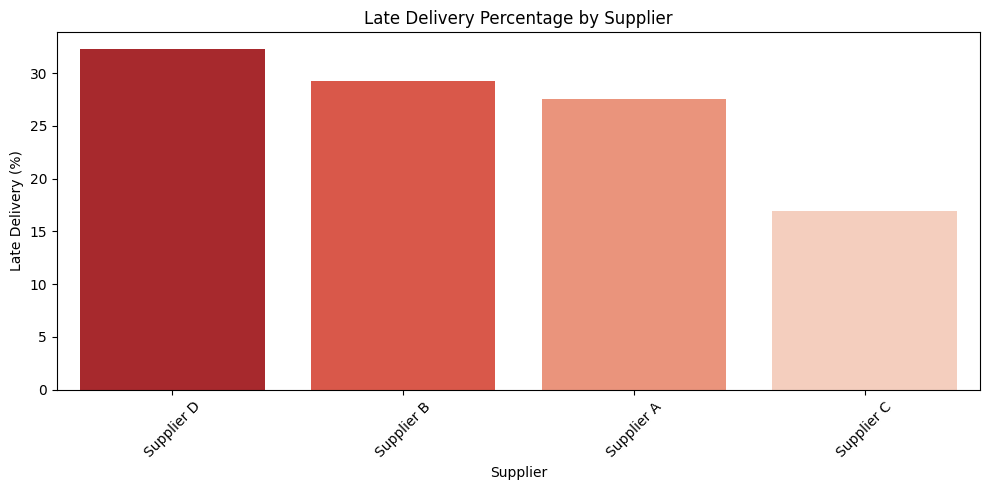

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(
    data=late_by_supplier.sort_values("Late_Delivery_%", ascending=False),
    x="Supplier", y="Late_Delivery_%", palette="Reds_r", hue= "Supplier", legend=False
)
plt.title("Late Delivery Percentage by Supplier")
plt.ylabel("Late Delivery (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Supplier D has highest late delivery percentage when compared to others.

Creating Heat-Map to check Delivery Performance by warehouse and supplier.

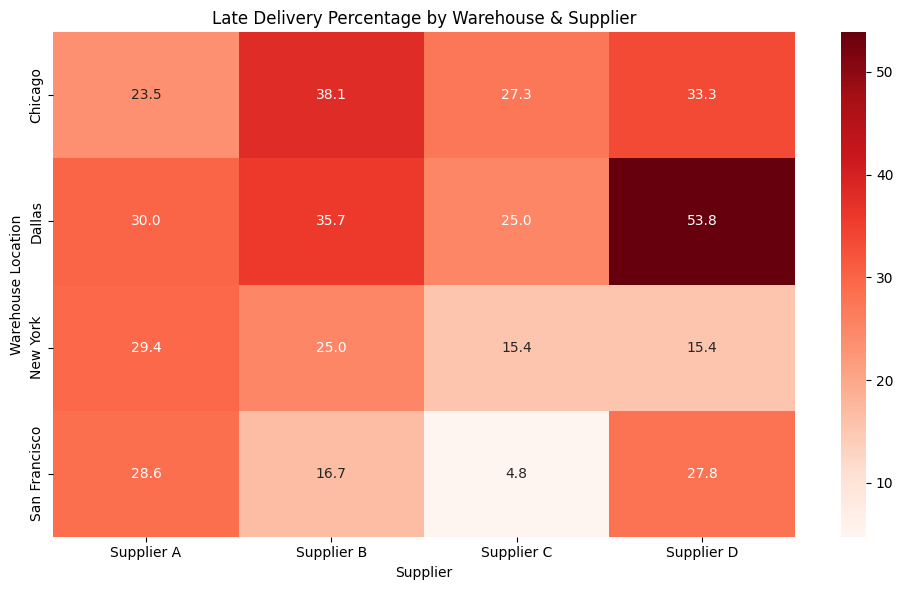

In [92]:
# Creating Heat-Map to check Delivery Performance by warehouse and supplier.
pivot = (
    df.groupby(['Warehouse_Location', 'Supplier'])['Is_Late']
      .mean()
      .mul(100)
      .reset_index()
      .pivot(index='Warehouse_Location', columns='Supplier', values='Is_Late')
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Late Delivery Percentage by Warehouse & Supplier")
plt.ylabel("Warehouse Location")
plt.xlabel("Supplier")
plt.tight_layout()
plt.show()

# CONCLUSION:
# Darker cell 53.8 indicate Supplier D has more late deliveries at Dallas.
# Supplier D can review shipping routes to optimise delivery delays.
# Increase Safety stock and identify bottlenecks.
# Set up regular monitoring of Dallas warehouse.

Inventory levels vs. reorder points

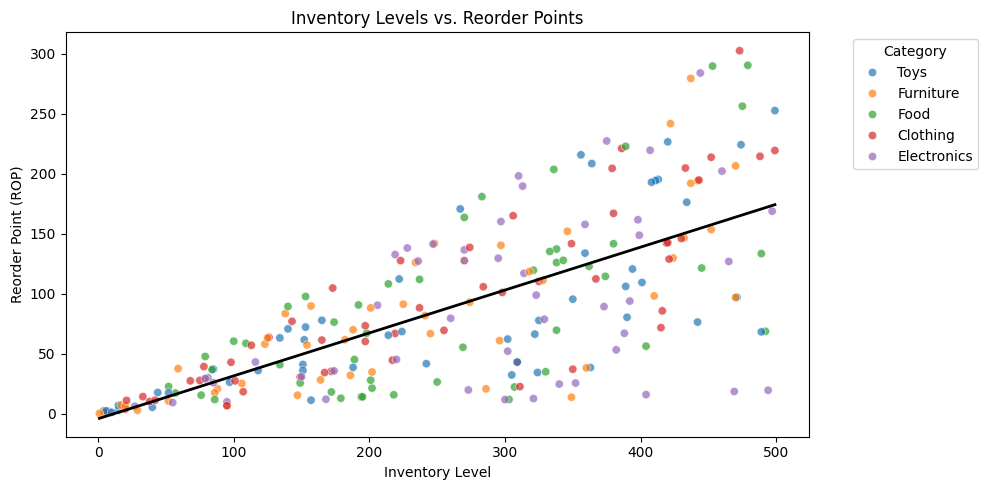

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df, x="Inventory_Level", y="ROP", hue="Category", alpha=0.7
)

#Adding Trend line.
sns.regplot(data=df, x="Inventory_Level", y="ROP",
            scatter=False, ci=None, color="black", line_kws={"linewidth":2})

plt.title("Inventory Levels vs. Reorder Points")
plt.xlabel("Inventory Level")
plt.ylabel("Reorder Point (ROP)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Conclusion from the Scatter Plot:
# Points below the trendline indicate risk of stockouts.
# points far above the trendline indicate overstocking (which will increase holding cost)
# we have to make sure that most of the points are close to the trendline. 
# Regularly update the ROP calculations based on demand and lead time and adjust inventory levels accordingly.

Cost impact of delivery delays

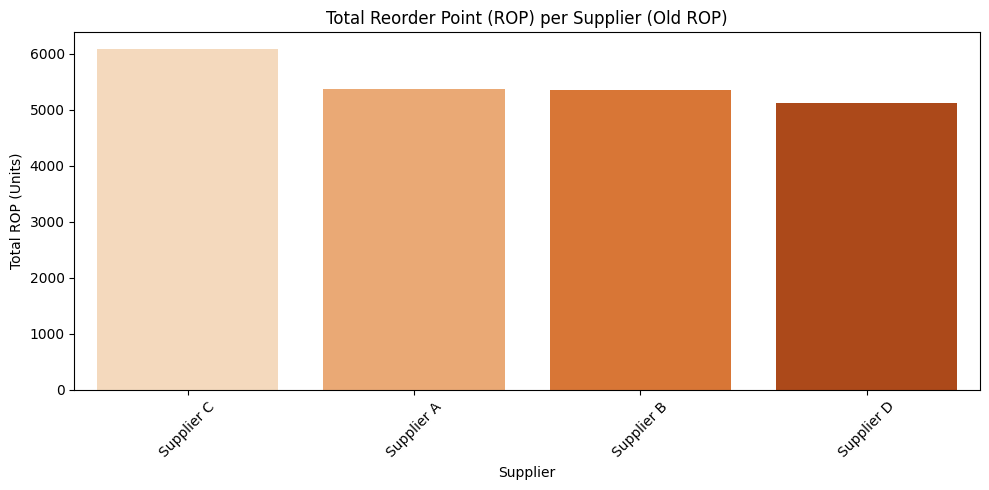

In [88]:
# Cost impact of delivery delays using the original ROP (before improvement)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df.groupby("Supplier")["ROP"].sum().reset_index().sort_values("ROP", ascending=False),
    x="Supplier", y="ROP", palette="Oranges",hue="Supplier", legend= False
)
plt.title("Total Reorder Point (ROP) per Supplier (Old ROP)")
plt.ylabel("Total ROP (Units)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

# Conclusions from the PLOT:
# Supplier C has Highest Reorder point (More inventory with the supplier)
# We can negotiate shorter lead times with Supplier C, A and B.
# 

Cost impact after lead times improve by 10%

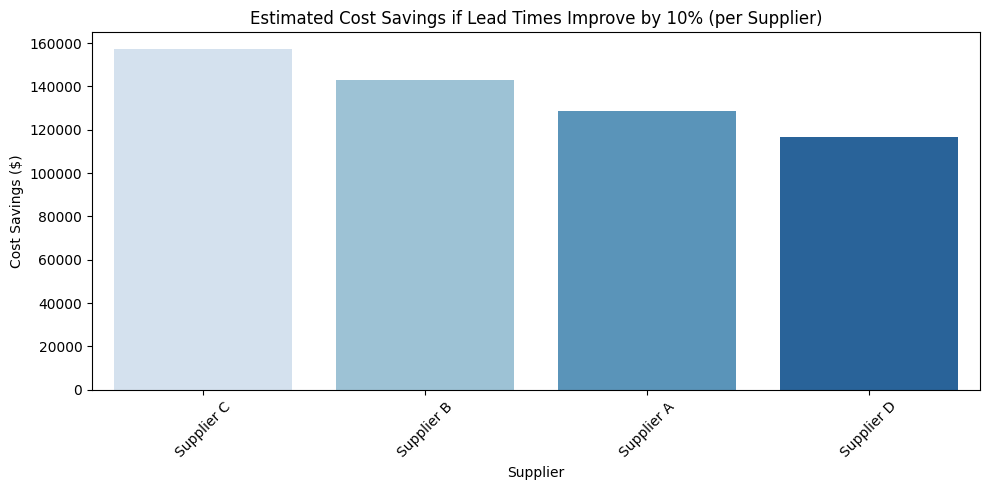

In [86]:
# Cost impact after lead times improve by 10%

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df.groupby("Supplier")["ROP_Saving_Cost"].sum().reset_index().sort_values("ROP_Saving_Cost", ascending=False),
    x="Supplier", y="ROP_Saving_Cost", hue="Supplier", palette="Blues", legend=False
)
plt.title("Estimated Cost Savings if Lead Times Improve by 10% (per Supplier)")
plt.ylabel("Cost Savings ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

# Supplier C has highest cost savings if Lead times are improved by 10%
# Supplier A and B also have saving potential.
# Definitely all the suppliers show significant improvement in the inventory cost savings.